In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
import pandas as pd
from statistics import mean

# plt.rcParams["figure.figsize"] = (3,3)
print (time.ctime())

Wed Jan  6 18:09:04 2021


In [2]:
# file1 = "/home/imaginglab/Data/TPX3/CHIP0/Test/8x8Grid_visEq_1s_W0028_F03-200228-095644-1.csv"
file1 ="/QuantumRouter/Data/AOD12242020/AOD_5s_CW_TDC_1usGW_W0028_H07-201224-104520-1.csv"
print (file1, time.ctime())

# data1=np.loadtxt(file1, dtype= float, delimiter=",", usecols = (0,1,2,3,4))
# data1 = np.genfromtxt(file1, delimiter=",", skip_header=True)[:, 1:]
data1 = pd.read_csv(file1)
print(pd.read_csv(file1, nrows=5))
print(time.ctime())
# #print data
# y1   = data1.iloc[:, 0]
# x1   = data1.iloc[:, 1]
# t1   = data1.iloc[:, 2]
# a1   = data1.iloc[:, 3]
# A1   = data1.iloc[:, 4]

# for i in range(0,20):
#     print (i, x1[i],y1[i],t1[i],a1[i],A1[i])
    
# print (len(t1), time.ctime())

# file2 = "/home/imaginglab/Data/TPX3/CHIP0/Test/8x8Grid_SettingsEq_1s_W0028_F03-200228-100050-1.csv"
file2 = "/QuantumRouter/Data/AOD12242020/AOD_5s_CW_TDC_1usGW_W0028_H07-201224-104520-1_time.csv"
print (file2, time.ctime())

# data2=np.loadtxt(file2, dtype= float, delimiter=",", usecols = (0,1,2,3,4))
# data2 = np.genfromtxt(file2, delimiter=",", skip_header=True)[:, 1:]
data2 =pd.read_csv(file2)
print(pd.read_csv(file2, nrows=5))
print(time.ctime())
# # #print data
# # y2  = data2.iloc[:, 0]
# # x2  = data2.iloc[:, 1]
# # t2  = data2.iloc[:, 2]
# # a2  = data2.iloc[:, 3]
# # A2  = data2.iloc[:, 4]

# # for i in range(0,20):
# #     print (i, x2[i],y2[i],t2[i],a2[i],A2[i])
    
# # print (len(t2), time.ctime())

/QuantumRouter/Data/AOD12242020/AOD_5s_CW_TDC_1usGW_W0028_H07-201224-104520-1.csv Wed Jan  6 18:09:04 2021
   #TrigId     #TrigTime  #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  \
0      705  158126088064   224    26  158247973120        425             425   
1      705  158126088064   225    10  158247973120        375             375   
2      705  158126088064   225    25  158247973120       4825            4825   
3      705  158126088064   225    30  158247973120       1075            1075   
4      705  158126088064   224     9  158247973120       2350            2350   

   #Trig-ToA[arb]  Unnamed: 8  
0       121885056         NaN  
1       121885056         NaN  
2       121885056         NaN  
3       121885056         NaN  
4       121885056         NaN  
Wed Jan  6 18:09:44 2021
/QuantumRouter/Data/AOD12242020/AOD_5s_CW_TDC_1usGW_W0028_H07-201224-104520-1_time.csv Wed Jan  6 18:09:44 2021
   #TrigId   #TrigTime  #TrigTimeNext  #Events Unnamed: 4
0        1   147196

In [3]:
data1.shape, data2.shape

((77704460, 9), (3669, 5))

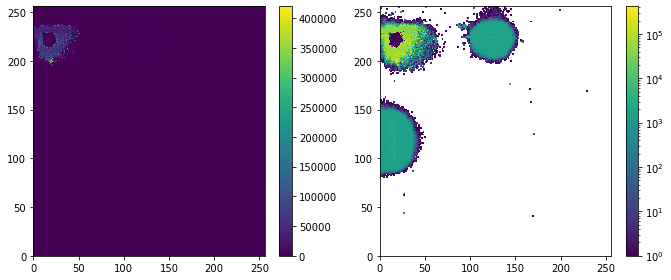

In [4]:
#File 1 grid
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data1['#Row'], data1['#Col'], bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(data1['#Row'], data1['#Col'], bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()

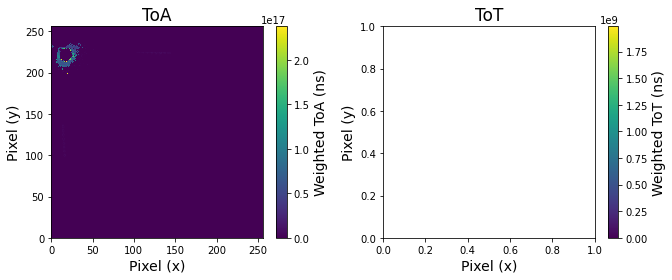

In [5]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')
# data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)]
h = ax0.hist2d(data1['#Row'], 
               data1['#Col'], 
               weights=data1['#ToA'], 
               bins = 256, range = [(0, 256), (0, 256)],
               )
cbar1 = fig.colorbar(h[3], ax = ax0)
#     cbar1.set_ticks([0,50,100,150,200,250])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar1.locator = tick_locator
#     cbar1.update_ticks()
cbar1.set_label('Weighted ToA (ns)', fontsize=14)
ax0.set_xlabel('Pixel (x)', fontsize=14)
ax0.set_ylabel('Pixel (y)', fontsize=14)
ax0.set_title('ToA', fontsize=17)

h = ax0.hist2d(data1['#Row'], 
               data1['#Col'], 
               weights=data1['#ToT[arb]'], 
               bins = 256, range = [(0, 256), (0, 256)],
               )
cbar2 = fig.colorbar(h[3], ax = ax1)
#     cbar2.set_ticks([0,300,600,900,1200,1500])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar2.locator = tick_locator
#     cbar2.update_ticks()
cbar2.set_label('Weighted ToT (ns)', fontsize=14)
ax1.set_xlabel('Pixel (x)', fontsize=14)
ax1.set_ylabel('Pixel (y)', fontsize=14)
ax1.set_title('ToT', fontsize=17)
fig.tight_layout()

In [6]:
# file1 ="/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1_cent.csv"
GridX1min = 115
GridX1max = 160
GridY1min = 105
GridY1max = 150

# file1 ="/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1.csv"
GridX2min = 118
GridX2max = 161
GridY2min = 108
GridY2max = 151

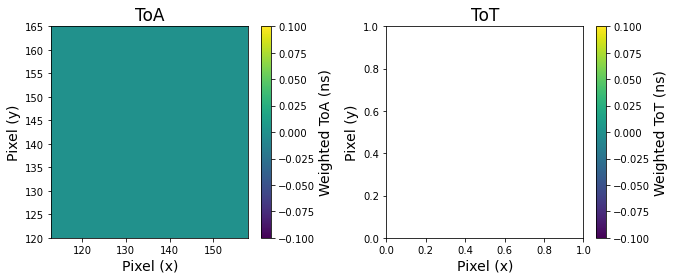

In [7]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')
# data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)]
h = ax0.hist2d(data1['#Row'], 
               data1['#Col'], 
               weights=data1['#ToA'], 
               bins = GridX1max-GridX1min, range = [(GridX1min-2, GridX1max-2), (GridY1min+15, GridY1max+15)],
               )
cbar1 = fig.colorbar(h[3], ax = ax0)
#     cbar1.set_ticks([0,50,100,150,200,250])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar1.locator = tick_locator
#     cbar1.update_ticks()
cbar1.set_label('Weighted ToA (ns)', fontsize=14)
ax0.set_xlabel('Pixel (x)', fontsize=14)
ax0.set_ylabel('Pixel (y)', fontsize=14)
ax0.set_title('ToA', fontsize=17)

h = ax0.hist2d(data1['#Row'], 
               data1['#Col'], 
               weights=data1['#ToT[arb]'], 
               bins = GridX1max-GridX1min, range = [(GridX1min-2, GridX1max-2), (GridY1min+15, GridY1max+15)],
               )
cbar2 = fig.colorbar(h[3], ax = ax1)
#     cbar2.set_ticks([0,300,600,900,1200,1500])
#     tick_locator = ticker.MaxNLocator(nbins=6)
#     cbar2.locator = tick_locator
#     cbar2.update_ticks()
cbar2.set_label('Weighted ToT (ns)', fontsize=14)
ax1.set_xlabel('Pixel (x)', fontsize=14)
ax1.set_ylabel('Pixel (y)', fontsize=14)
ax1.set_title('ToT', fontsize=17)
fig.tight_layout()

In [ ]:
#File 1 grid

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min-2, GridX1max-2), (GridY1min+15, GridY1max+15)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()
# fig.savefig('fullgrid_8212020_025044-1_cent.png')

In [ ]:
#Display 1th order bottom spot

fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(10, 8))

h1 = ax1.hist2d(data1['#Row'], data1['#Col'], bins = 76, range = [(0, 76), (180, 256)])
fig.colorbar(h[3], ax = ax1)
ax1.set_title('0th order beam')

h2 = ax2.hist2d(data1['#Row'], data1['#Col'], bins = 55, range = [(110, 165), (201,256)])
fig.colorbar(h[3], ax = ax2)
ax2.set_title('1st order beam parallel to x axis')

h3 = ax3.hist2d(data1['#Row'], data1['#Col'], bins = 75, range = [(0, 75), (90, 165)])
fig.colorbar(h[3], ax = ax3)
ax3.set_title('1st order beam parallel to y axis')

h4 = ax4.hist2d(data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min-2, GridX1max-2), (GridY1min+15, GridY1max+15)])
fig.colorbar(h[3], ax = ax4)
ax4.set_title('Grid')


In [8]:
def min_max(data, grid_x_min, grid_x_max, grid_y_min, grid_y_max):
    """Returns DataFrame filtering values less than min or greater than max for two columns"""
    x_cond = (data['#Row'] <grid_x_min) | (data['#Row'] > grid_x_max)
    y_cond = (data['#Col'] < grid_y_min) | (data['#Col'] > grid_y_max)
    new_data = data.drop(data[x_cond | y_cond].index)
    return new_data



In [ ]:
grid1_df = min_max(data1, GridX1min, GridX1max, GridY1min, GridY1max)

print(grid1_df.shape, type(grid1_df.iloc[0,0]), type(grid1_df.iloc[1,1]), time.ctime())
print(grid1_df.iloc[:3])

# grid2_df = min_max(data2, GridX2min, GridX2max, GridY2min, GridY2max)

# print(grid2_df.shape, type(grid2_df.iloc[0,0]), type(grid2_df.iloc[1,1]), time.ctime())
# print(grid2_df.iloc[:3])

In [9]:
oth_df = min_max(data1, 0, 76, 180, 256)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(oth_df.shape, type(oth_df.iloc[0,0]), type(oth_df.iloc[1,1]), time.ctime())
print(oth_df.iloc[:3])

(71819613, 9) <class 'numpy.int64'> <class 'numpy.int64'> Wed Jan  6 18:11:34 2021
   #TrigId     #TrigTime  #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  \
0      705  158126088064   224    26  158247973120        425             425   
1      705  158126088064   225    10  158247973120        375             375   
2      705  158126088064   225    25  158247973120       4825            4825   

   #Trig-ToA[arb]  Unnamed: 8  
0       121885056         NaN  
1       121885056         NaN  
2       121885056         NaN  


In [ ]:
X_df = min_max(data1, 110, 165, 201, 256)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(X_df.shape, type(X_df.iloc[0,0]), type(X_df.iloc[1,1]), time.ctime())
print(X_df.iloc[:3])

In [ ]:
Y_df = min_max(data1, 0, 75, 90, 165)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Y_df.shape, type(Y_df.iloc[0,0]), type(Y_df.iloc[1,1]), time.ctime())
print(Y_df.iloc[:3])

In [10]:
TrigTime = data2['#TrigTime'].to_numpy()

IndexError: index 3669 is out of bounds for axis 0 with size 3669

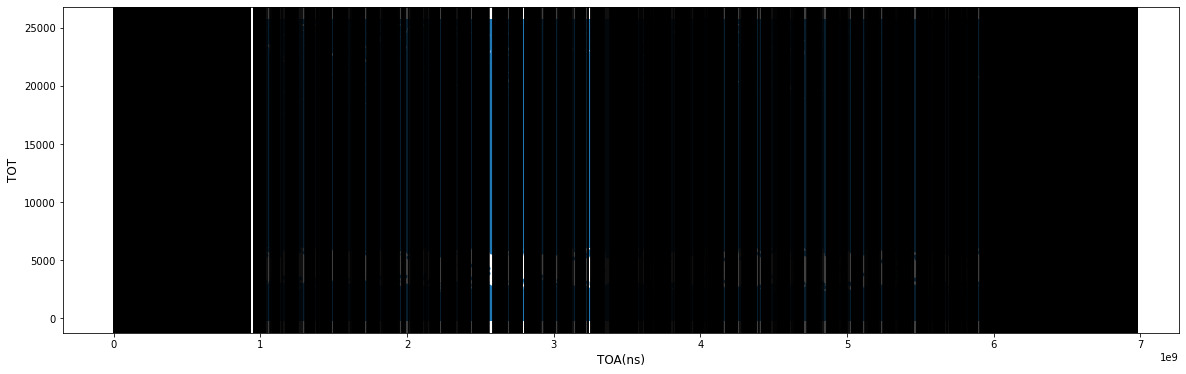

In [12]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(oth_df['#ToA']/4096.*25.,oth_df['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
for i in range(5000):
    plt.axvline(x=(TrigTime[i]/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.axvline(x=(TOA_MIN/4096.*25.), ymin=0, ymax=2500, color='k')
# plt.xlim(963691753.125-50, 963691753.125+250)
plt.xlim(3.25875e9, 3.2592e9)
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

In [ ]:
ToAmin = (3.25875e9)*4096./25.
ToAmax = (3.2592e9)*4096./25.
globals()["oth_pulse_3.25875e9_3.25920e9_df"] = \
oth_df.drop(oth_df[(oth_df['#ToA'] < ToAmin) | (oth_df['#ToA'] > ToAmax)].index)

In [ ]:
(globals()["oth_pulse_3.25875e9_3.25920e9_df"]['#ToA'].min()/4096.*25.)-(3259079038.800049)

In [ ]:
(TrigTime[1]/4096.*25.-TrigTime[0]/4096.*25.)*10**(-3)

In [ ]:
TrigTime[0], TrigTime[1]

In [ ]:
for i in range(len(TrigTime)):
    if (ToAmin < TrigTime[i] < ToAmax):
        print(TrigTime[i]/4096.*25, " ")

In [ ]:
print((globals()["oth_pulse_pulse_3.25875e9_3.2592e9_df"]['#ToA'].min()/4096.*25.)-(3259079038.800049), 'ns')

In [ ]:
periodlist = []

for i in range(len(TrigTime)):
    periodlist.append(TrigTime[i+1]-TrigTime[i])
    print(TrigTime[i+1]-TrigTime[i])

In [ ]:
for i in range(len(periodlist)):
    periodlist[i] = periodlist[i]/4096.*25

In [ ]:
len(periodlist)

In [ ]:
print('Average period between trigger times:', mean(periodlist)*10**(-3), 'us')

In [ ]:
(n, bins, patches) = plt.hist(periodlist,range = (0,3e6), bins = 1000)
plt.title("Trigger Period", fontsize = 12) # change the title
plt.xlabel('Trigger Period, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
# plt.legend(loc='upper right')
# plt.xticks(bins[::80])
plt.show()